# How to calculate Zwicker loudness from .wav file (steady signal)

MoSQITo is a unified and modular development framework of key sound quality metrics favoring reproducible science and efficient shared scripting among engineers, teachers and researchers community.

This tutorial explains how to calculate the acoustic loudness (Zwicker method) of a steady signal from a .wav file

In [10]:
# Add MoSQITo to the Python path
import sys
sys.path.append('..')

# Import useful packages
import math
import numpy as np
import matplotlib.pyplot as plt

# Import MoSQITo modules
from mosqito.signal.load2oct3 import load2oct3
from mosqito.oct3filter.comp_third_spectrum import comp_third_spec
from mosqito.loudness_zwicker.comp_loudness import comp_loudness

For this tutorial, the test signal n°3 from ISO 532-1 annex B3 is used (1 kHz tone in free field with a level of 60 dB). According to the standard, for the calibration of the WAVE file, 0 dB (relative to full scale) shall correspond to a sound pressure level of 100 dB.   

The signal is loaded and its third-octave spectrum is computed using the "load2oct3" script.
By default, the script calculates 28 third octave levels from 25 Hz to 12500 Hz in dB re. $2.10^{-5}$ Pa.

The "load2oct3" function takes 3 parameters:
 - The signal type as a boolean: *True since the signal is stationary*
 - The path to the .wav signal file: *The file belongs to the "tests/loudness/data" folder*
 - A calibration factor for the signal to be in Pa: *A value of 2√2 corresponds to the norm's directive*


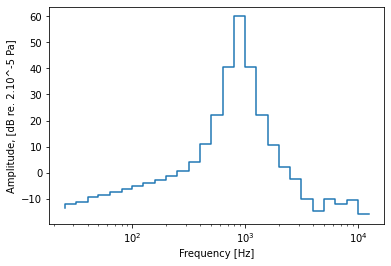

In [12]:
# Load signal and compute third-octave spectrum
spec_third, third_axis = load2oct3(True,'../tests/loudness/data/ISO_532-1/Test signal 3 (1 kHz 60 dB).wav', calib = 2 * 2**0.5 )

# Plot third octave band spectrum
plt.step(third_axis, spec_third)
plt.xscale('log')
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude, [dB re. 2.10^-5 Pa]")
plt.show()

Finally the function "comp_loudness" is used with the signal type, the third octave band spectrum and the field type as input parameters.  
The script calculates the loudness N in sones, the specific loudness N_specific in sones/Bark and the corresponding critical band rate scale bark_axis in Bark.

Loudness = 4.052 sone


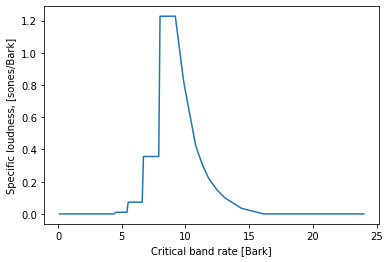

In [13]:
N, N_specific, bark_axis = comp_loudness(True, spec_third, field_type="free")
print('Loudness = ' + str(N) + ' sone')
plt.plot(bark_axis, N_specific)
plt.xlabel("Critical band rate [Bark]")
plt.ylabel("Specific loudness, [sones/Bark]")
plt.show()